2. Fix mol file for the handful of molecules with 4 binds to N issues
3. Check if the active sites have shared fingerprints

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms

In [48]:
m = Chem.MolFromMolFile("/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles/sf96x0_optsp_a0m2.mol") #, removeHs=False)

In [49]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))

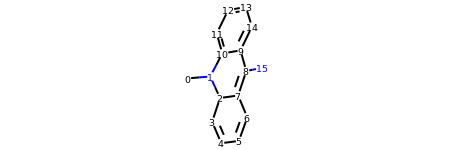

In [50]:
m

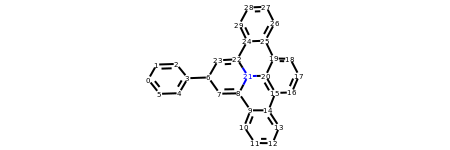

In [3]:
m = Chem.MolFromMolFile("/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles/sf245x0_optsp_a0m2.mol") #, removeHs=False)
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

In [46]:
m_conf = m.GetConformers()[0]

In [47]:
rdMolTransforms.GetDihedralDeg(m_conf, 2,1,10,11)

-163.18834600867964

In [6]:
print(rdMolDescriptors.CalcNumAromaticRings(m))
print(rdMolDescriptors.CalcNumAromaticCarbocycles(m))
print(rdMolDescriptors.CalcNumAromaticHeterocycles(m))
print(rdMolDescriptors.CalcNumAliphaticRings(m))

1
1
0
2


In [7]:
for neigh in m.GetAtoms()[1].GetNeighbors():
    print(neigh.GetIdx())

0
10
2


In [28]:
df = pd.read_csv("/home/nricke/work/ngcc_ml/DidItBindv5.csv", index_col=0)
df.rename(columns={"Catalyst Name":"catalyst_name"}, inplace=True)
df["Doesitbind"] = df["Doesitbind"].astype("int")
df_active = df[df["Doesitbind"] == 1]

In [20]:
moldir = "/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles-chargefix"
catalyst_mols = {}
molfile_list = os.listdir(moldir)
for molfile in molfile_list:
    mol = Chem.MolFromMolFile(os.path.join(moldir, molfile))
    print(molfile)
    
    catalyst_mols[molfile] = mol

sf224x0_optsp_a0m2.mol
sf101x0_optsp_c1m2.mol
sf249x0_optsp_a0m2.mol
sf221x0_optsp_a0m2.mol
sf152x0_optsp_a0m2.mol
sf123x0_optsp_a0m2.mol
sf245x0_optsp_a0m2.mol
sf205x0_optsp_c1m2.mol
sf117x0_optsp_a0m2.mol
sf13x1_optsp_c1m2.mol
sf227x0_optsp_a0m2.mol
sf138x0_optsp_a0m2.mol
sf135x0_optsp_a0m2.mol
sf257x0_optsp_a0m2.mol
sf186x0_optsp_a0m2.mol
sf2x0_optsp_a0m2.mol
sf281x0_optsp_a0m2.mol
sf260x0_optsp_c1m2.mol
sf25x1_optsp_a0m2.mol
sf11x0_optsp_a0m2.mol
sf24x1_optsp_a0m2.mol
sf82x0_optsp_a0m2.mol
sf106x0_optsp_a0m2.mol
sf253x0_optsp_a0m2.mol
sf159x0_optsp_a0m2.mol
sf132x0_optsp_a0m2.mol
sf184x0_optsp_a0m2.mol
sf172x0_optsp_a0m2.mol
sf209x0_optsp_c1m2.mol
sf21x2_optsp_a0m2.mol
sf171x0_optsp_a0m2.mol
sf79x0_optsp_a0m2.mol
sf244x0_optsp_a0m2.mol
sf147x0_optsp_a0m2.mol
sf99x0_optsp_a0m2.mol
sf127x0_optsp_a0m2.mol
sf31x1_optsp_a0m2.mol
sf95x0_optsp_c1m2.mol
sf139x0_optsp_a0m2.mol
sf190x0_optsp_c1m2.mol
sf201x0_optsp_a0m2.mol
sf76x0_optsp_a0m2.mol
sf43x0_optsp_a0m2.mol
sf174x0_optsp_a0m2.mol
sf

In [3]:
catalyst_mols

{'sf224x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650580>,
 'sf101x0_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f36936508a0>,
 'sf249x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f36936508f0>,
 'test_mol_sf9x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650940>,
 'sf221x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650990>,
 'sf152x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f36936509e0>,
 'sf123x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650a80>,
 'sf245x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650ad0>,
 'sf205x0_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650b20>,
 'sf117x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650b70>,
 'sf13x1_optsp_c1m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650bc0>,
 'sf227x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650c10>,
 'sf138x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650c60>,
 'sf135x0_optsp_a0m2.mol': <rdkit.Chem.rdchem.Mol at 0x7f3693650cb0>,
 'sf257x0_opts

In [9]:
all_fp = {}
all_fp_set = set()
for i, mol in enumerate(catalyst_mols):
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=1, bitInfo=bi)
    fpl = list(fp.GetOnBits())
    #print(fpl)
    all_fp[molfile_list[i]] = {"fp": fpl, "bi": bi}
    all_fp_set = all_fp_set.union(set(fpl))

print()
print(all_fp_set)
print(len(all_fp_set))

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(str)
did not match C++ signature:
    GetMorganFingerprintAsBitVect(RDKit::ROMol mol, int radius, unsigned int nBits=2048, boost::python::api::object invariants=[], boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, boost::python::api::object bitInfo=None)

In [21]:
df_mol = pd.DataFrame.from_dict(catalyst_mols, orient="index").reset_index().rename(columns={0:"mol", "index":"filename"})
df_mol = df_mol.assign(catalyst_name=df_mol.filename.str.split("_").str[0])

In [22]:
df_mol

,filename,mol,catalyst_name
0,sf224x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913af8a0>,sf224x0
1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>,sf101x0
2,sf249x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36914213a0>,sf249x0
3,sf221x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364f30>,sf221x0
4,sf152x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364ee0>,sf152x0
5,sf123x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364e90>,sf123x0
6,sf245x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364e40>,sf245x0
7,sf205x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364df0>,sf205x0
8,sf117x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364da0>,sf117x0
9,sf13x1_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f3691364d50>,sf13x1


In [31]:
df_fp = df_active.merge(df_mol.drop_duplicates(subset="catalyst_name"), on="catalyst_name", how="inner")

In [55]:
"""
calc all fingerprints centered on active sites
determine which fingerprints are most common
for the most common 5 fingerprints, take a representative molecule and display the fingerprint on that molecule
"""
fp_list, bi_list, fp_l0, fp_l1 = [], [], [], []
for index, row in df_fp.iterrows():
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(row["mol"], radius=1, fromAtoms=[row["Atom Number"]-1], bitInfo=bi)
    fp_list.append(fp)
    bi_list.append(bi)
    fp_onbits = list(fp.GetOnBits())
    print(fp_onbits)
    assert(len(fp_onbits) == 2)
    fp_l0.append(fp_onbits[0])
    fp_l1.append(fp_onbits[1])


[423, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[464, 1873]
[423, 1873]
[1260, 1873]
[1632, 1873]
[423, 1873]
[1840, 1873]
[157, 1019]
[1840, 1873]
[1840, 1873]
[503, 1019]
[1840, 1873]
[1840, 1873]
[1019, 1855]
[1840, 1873]
[1366, 1645]
[1840, 1873]
[1019, 1963]
[1840, 1873]
[547, 1873]
[547, 1873]
[1249, 1873]
[862, 1873]
[1083, 1873]
[1840, 1873]
[336, 1019]
[1840, 1873]
[336, 1019]
[1840, 1873]
[1840, 1873]
[535, 1019]
[1840, 1873]
[1840, 1873]
[1840, 1873]
[423, 1873]
[423, 1873]
[1840, 1873]
[237, 926]
[423, 1873]
[1840, 1873]
[237, 926]
[423, 1873]
[1750, 1873]
[543, 1380]
[237, 926]
[1840, 1873]
[1249, 1873]
[1840, 1873]
[237, 926]
[1840, 1873]
[237, 926]
[1750, 1873]
[1840, 1873]
[139, 926]
[1840, 1873]
[1840, 1873]
[862, 1873]
[1840, 1873]
[862, 1873]
[673, 1019]
[1366, 1645]
[1840, 1873]
[423, 1873]
[310, 1380]
[547, 1873]
[423, 1873]
[862, 1873]
[1840, 1873]
[310, 1380]
[862, 1873]
[423, 1873]
[862, 1873]
[1840, 1873]
[1093, 1

In [66]:
df_fp = df_fp.assign(fp0=fp_l0, fp1=fp_l1, bi=bi_list)

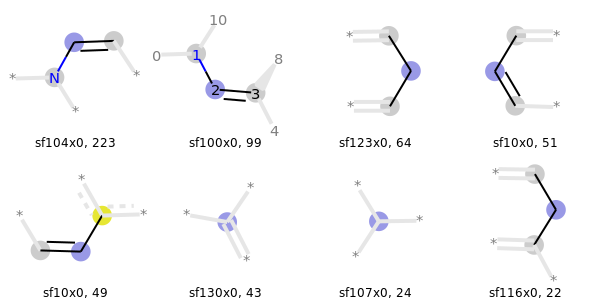

In [70]:
top8 = df_fp.fp0.value_counts().head(8)
tpls_selected = []
tpls_names = []
for fp_bit in top8.index:
    # get row from dataframe with this fingerprint
    row_top = df_fp[df_fp["fp0"] == fp_bit].iloc[0]  # any will do
    # generate display tuple
    tpls_selected.append((row_top["mol"], fp_bit, row_top["bi"]))
    # generate tuple name
    tpls_names.append(row_top["catalyst_name"]+", "+str(top8.loc[fp_bit]))
    
Draw.DrawMorganBits(tpls_selected,molsPerRow=4,legends=tpls_names)

In [33]:
m = df_fp.iloc[0].mol

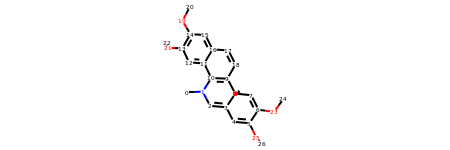

In [45]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

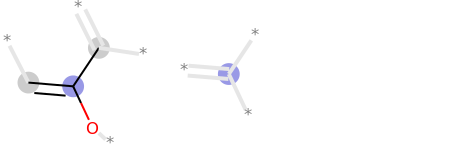

In [44]:
bi = {}
fpm = AllChem.GetMorganFingerprintAsBitVect(m, radius=1, fromAtoms=[5], bitInfo=bi)
tpls_m = [(m, x, bi) for x in fpm.GetOnBits()]
Draw.DrawMorganBits(tpls_m)

In [40]:
df_fp

,Atom Number,catalyst_name,CatalystO2File,Element,SpinDensity,ChElPGPositiveCharge,ChElPGNeutralCharge,ChargeDifference,Doesitbind,BondLength,...,AromaticExtent,RingEdge,NumNitrogens,NumHeteroatoms,ring_nitrogens,atom_plane_deviation,ring_plane_deviation,charge,filename,mol
0,3,sf100x0,sf100x0O2-2_optsp_a0m2.out,C,0.555664,-0.064043,-0.339572,-0.275529,1,1.535452,...,18,2,1,5,1,6.723311e-02,2.630862e-01,0,sf100x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913def80>
1,3,sf101x0,sf101x0O2-2_optsp_c1m2.out,C,0.142705,-0.313224,-0.387140,-0.073916,1,1.511023,...,26,2,2,2,2,9.341000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
2,12,sf101x0,sf101x0O2-11_optsp_c1m2.out,C,0.142598,-0.304842,-0.378220,-0.073378,1,1.510734,...,26,2,2,2,2,8.277000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
3,14,sf101x0,sf101x0O2-13_optsp_c1m2.out,C,0.167093,-0.259752,-0.338860,-0.079108,1,1.503761,...,26,2,2,2,2,2.866000e-07,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
4,25,sf101x0,sf101x0O2-24_optsp_c1m2.out,C,0.167076,-0.259686,-0.338835,-0.079149,1,1.511047,...,26,2,2,2,2,5.660000e-08,2.599700e-06,1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f369349dbc0>
5,3,sf102x0,sf102x0O2-2_optsp_c1m2.out,C,0.210099,-0.275257,-0.383752,-0.108495,1,1.505260,...,16,2,2,2,2,1.261000e-07,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
6,8,sf102x0,sf102x0O2-7_optsp_c1m2.out,C,0.205799,-0.273892,-0.379959,-0.106067,1,1.505522,...,16,2,2,2,2,4.300000e-09,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
7,10,sf102x0,sf102x0O2-9_optsp_c1m2.out,C,0.240388,-0.230612,-0.344736,-0.114124,1,1.495640,...,16,2,2,2,2,5.321000e-07,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
8,15,sf102x0,sf102x0O2-14_optsp_c1m2.out,C,0.235954,-0.232303,-0.346221,-0.113918,1,1.505553,...,16,2,2,2,2,9.500000e-08,2.651000e-07,1,sf102x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36913de530>
9,3,sf103x0,sf103x0O2-2_optsp_a0m2.out,C,0.133525,-0.327030,-0.488787,-0.161757,1,1.533712,...,16,2,2,2,2,2.090000e-08,2.616000e-07,0,sf103x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f36914fe260>


In [39]:
#fpm = AllChem.GetMorganFingerprint(m, radius=1, fromAtoms=[10])
bi={}
fpm = AllChem.GetMorganFingerprintAsBitVect(m, radius=1, fromAtoms=[10], bitInfo=bi)
print(list(fpm.GetOnBits()))
print(bi)

[146, 1380]
{146: ((10, 1),), 1380: ((10, 0),)}


In [22]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=1, bitInfo=bi)
fpl = list(fp.GetOnBits())
fpl

[106,
 114,
 139,
 146,
 204,
 664,
 738,
 774,
 881,
 906,
 935,
 1019,
 1072,
 1364,
 1380,
 1427,
 1582,
 1652,
 1747,
 1798]

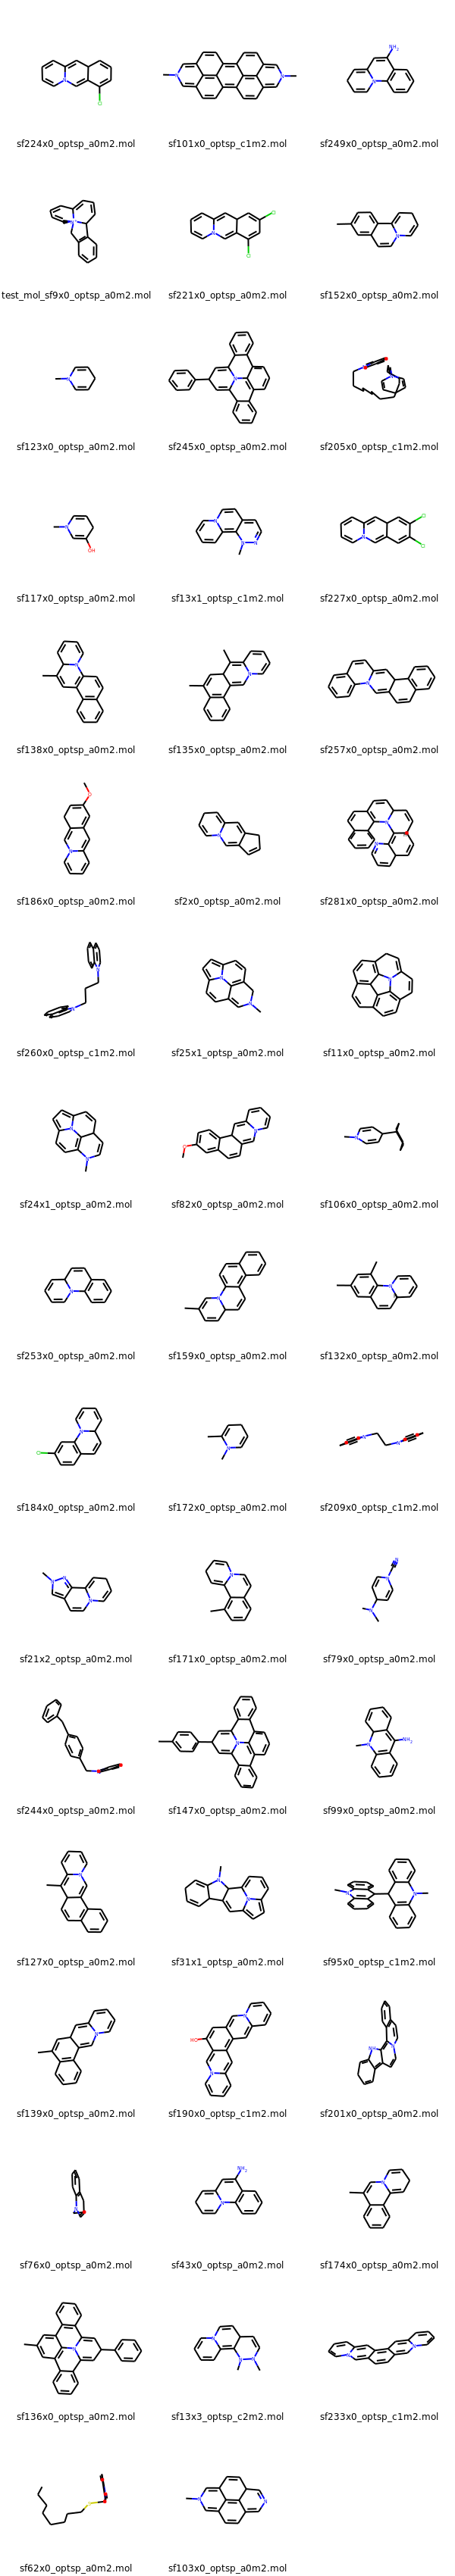

In [33]:

Draw.MolsToGridImage(list(catalyst_mols.values()), legends=list(catalyst_mols.keys()))